## Transformer Designer - Power

References
* [Transformer Design and Manufacturing Manual - Wolpert](http://www.vintagewindings.com/gen%20pop/8299543VW8335/TransDesign%201/Wolpert-PowerTransformers.pdf)
* [Flux Lines to Tesla](http://www.translatorscafe.com/cafe/EN/units-converter/magnetic-flux-density/10-1/line%2Finch%C2%B2-tesla/)

Here are the default transformer parameter values

    laminationVA           = lamva      
    fluxDensity            = 0.00       
    circularMilsPerAmp     = 800.0
    coreLoss               = 0.66  # watts/lbs
    efficiency             = 0.90  # 1/1.11 in wolpert p10
    lineFrequency          = 60.0       
    stackingFactor         = 0.92  # stacking factor wolpert p11 
                                   #  0.92 1x1 interleave, 0.95 butt stack
    lossFactor             = 0.95  # 1/1.05 in wolpert p11
    isolationThickness     = 0.003 # 1 mil kapton
    wrappingThickness      = 0.015      
    weightExtra            = 1.15  # percentage of extra: bells, brackets, screws
    insulationLayers       = 3
    
To Do
 * check the weight calculation
 * add route plots as visualization
 * add jax equations

In [11]:
%matplotlib notebook
import Winding, Transformer
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# 6V6GT Push-Pull AB2 Power Transformer
# 2 12AX7, 2 6V6GT, 1 5Y3

%reload_ext autoreload

primary      = Winding.Winding('p',115.0,0.0,None)
secondary5   = Winding.Winding('s',  5.0,2.0,None)    #filament rectifier
secondary6   = Winding.Winding('s',  6.3,1.7,[50])    #filaments 6v6,12ax7
secondary325 = Winding.Winding('s',325.0,0.125,[50])  #plate
secondary20  = Winding.Winding('s', 20.0,0.002,None)   #fixed bias

t = Transformer.Transformer([secondary5,secondary6,primary,secondary325,secondary20],90) # windings order by gauge
t.coreLoss           = 0.66  # watts/lb GOES lam
t.wrappingThickness  = 0.005
t.insulationLayers   = 2

t.fluxDensity = t.fluxFind(bmax=100000,inc=100) # this scans through flux densities and finds minimal error for output voltage
t.compute()
t.report()


Requirements
  Primary              = 115.0 V
  Secondary            =   5.0 V @ 2.000 A 
  Secondary            =   6.3 V @ 1.700 A Taps 50
  Secondary            = 325.0 V @ 0.125 A Taps 50
  Secondary            =  20.0 V @ 0.002 A 
  Size                 = EI-1 1/4
  AWG Selection        = 40 37 34 32 31 27 24 22 20 18 15 
  VA Selection         = 90.0 VA

Transformer
  VA Computed          = 61.4 VA
  Flux Density         = 89700 lines, 13903 gauss
  Circular Mils/Amp    = 800
  Weight               = 4.2lbs
  Loss                 = 2.4W
  Temp Rise            = 10C

Lamination
  Size                 = EI-1 1/4
  Stack Height         = 1.25
  Stacking Factor      = 0.920
  Core Area            = 1.562 in*in
  Core Area Effective  = 1.438 in*in
  Window Height        = 0.625
  Window Length        = 1.875

Windings
  Type                  Secondary   Secondary   Primary     Secondary   Secondary   
  Voltage V             5.0         6.3         115.0       325.0       20.0        

<type 'numpy.ndarray'>


<IPython.core.display.Javascript object>


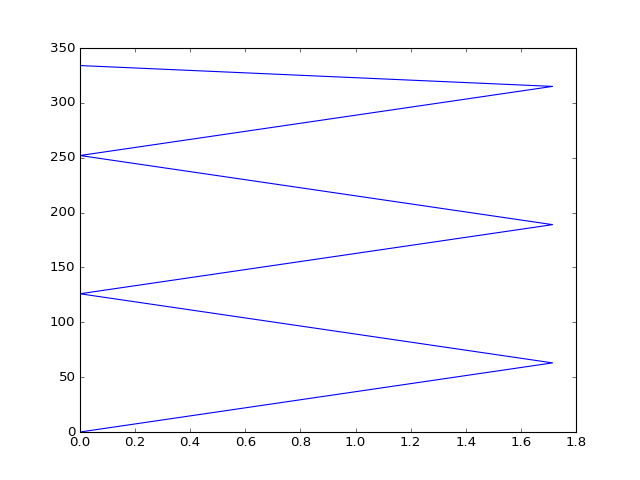

In [28]:
t.route()
a = np.array(t.windings[2].route)
x = a[:,0]
x = np.insert(x,0,0)
turns = a[:,1]
turns = np.insert(turns,0,0)
plt.plot(x,turns)

In [3]:
%reload_ext autoreload

# here's a filament transformer design using EI150 lamination
# I'm using this for a bench power supply
# 5.0V@5A, 6.3V@8A, 12.6V@6A

primary      = Winding.Winding('p',115.0,0.0,None)
secondary5a  = Winding.Winding('s',5.0 ,2.5,[50])
secondary5b  = Winding.Winding('s',5.0 ,2.5,[50])
secondary6a  = Winding.Winding('s',6.3 ,4.0,[50])
secondary6b  = Winding.Winding('s',6.3 ,4.0,[50])
secondary12a = Winding.Winding('s',12.6,3.0,[50])
secondary12b = Winding.Winding('s',12.6,3.0,[50])

t = Transformer.Transformer([primary,secondary6a,secondary6b,secondary12a,secondary12b,secondary5a,secondary5b],160,have=1)
t.coreLoss           = 0.8  # watts/lb, using AK DI-MAX M-13 at 12kG
t.isolationThickness = 0.003
t.wrappingThickness  = 0.005
t.insulationLayers   = 2

t.fluxDensity = t.fluxFind(bmax=100000,inc=500) # this scans through flux densities and finds minimal error for output voltage
t.compute()
t.report()


Requirements
  Primary              = 115.0 V
  Secondary            =   6.3 V @ 4.000 A Taps 50
  Secondary            =   6.3 V @ 4.000 A Taps 50
  Secondary            =  12.6 V @ 3.000 A Taps 50
  Secondary            =  12.6 V @ 3.000 A Taps 50
  Secondary            =   5.0 V @ 2.500 A Taps 50
  Secondary            =   5.0 V @ 2.500 A Taps 50
  Size                 = EI-1 1/2
  AWG Selection        = 40 37 34 32 31 27 24 22 20 18 15 
  VA Selection         = 160.0 VA

Transformer
  VA Computed          = 151.0 VA
  Flux Density         = 84000 lines, 13020 gauss
  Circular Mils/Amp    = 800
  Weight               = 7.5lbs
  Loss                 = 5.4W
  Temp Rise            = 16C

Lamination
  Size                 = EI-1 1/2
  Stack Height         = 1.5
  Stacking Factor      = 0.920
  Core Area            = 2.250 in*in
  Core Area Effective  = 2.070 in*in
  Window Height        = 0.75
  Window Length        = 2.25

Windings
  Type                  Primary     Secondary   Second

In [4]:
t.gcode()

(----------------------------------------------)


AttributeError: 'module' object has no attribute '__file__'

In [ ]:
# grid bias transformer

primary   = Winding.Winding('p',115.0,0.0,None)
secondary = Winding.Winding('s',100.0 ,0.020,[50])

t = Transformer.Transformer([primary,secondary],7)
t.coreLoss           = 0.66 # watts/lbs, goes

t.fluxDensity = t.fluxFind(bmax=100000)
#t.fluxDensity = 90000
t.compute()
t.report()
t.fluxTable()
t.fluxTable(sort='error')

In [ ]:
# power transformer for a flyback tube output stage screen bias 200V

primary       = Winding.Winding('p',115.0,0.0,None)
secondary5    = Winding.Winding('s',5.0,2.0,None)
secondary6    = Winding.Winding('s',6.3,2.0,[50])
secondary200  = Winding.Winding('s',200.0,0.05,None)
secondary500  = Winding.Winding('s',500.0,0.100,[50])

t = Transformer.Transformer([secondary5,secondary6,primary,secondary500,secondary200],90)
t.circularMilsPerAmp = 700
t.coreLoss           = 0.88 # watts/lbs
t.wrappingThickness  = 0.05

t.fluxDensity = t.fluxFind()
t.compute()
t.report()

t.fluxTable()
t.fluxTable(sort='error')